In [18]:
import os
import gzip
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load metadata
metadata = pd.read_csv("metadata.csv")
print("Metadata Sample:\n", metadata.head())

# Load activity annotation labels
annotations = pd.read_csv("annotation-label-dictionary.csv")
print("\nAnnotation Dictionary Sample:\n", annotations.head())

# Define the folder path where extracted files are stored
data_folder = "/Users/vaijanatha/Downloads/capture24"  # Update this with your actual folder path

# List all CSV.gz files
gz_files = [f for f in os.listdir(data_folder) if f.endswith('.csv.gz')]

# Check if any files exist
if not gz_files:
    raise FileNotFoundError("No CSV.gz files found in the specified folder!")

# Define a function to read a CSV.gz file
def load_gz_file(file_path):
    with gzip.open(file_path, 'rt') as f:
        return pd.read_csv(f)

# Load the first file as an example
sample_file = os.path.join(data_folder, gz_files[0])
df = load_gz_file(sample_file)  # ✅ Use df instead of df_sample

print("Columns in the sample dataset:", df.columns.tolist())

# Print sample data before preprocessing
print("Sample Data Before Processing:\n", df.head())
print(df.shape)

def preprocess_data(df):
    # Print available columns before processing
    print("Available columns in dataset:", df.columns.tolist())

    # Required columns
    required_columns = {'time', 'x', 'y', 'z'}
    
    # Check if required columns exist
    missing_columns = required_columns - set(df.columns)
    if missing_columns:
        raise ValueError(f"Missing required columns: {missing_columns}")

    # Convert time column to datetime
    df["time"] = pd.to_datetime(df["time"], errors='coerce')

    # Drop rows with NaN values in time column
    df.dropna(subset=["time"], inplace=True)

    # Normalize x, y, z values
    scaler = StandardScaler()
    df[["x", "y", "z"]] = scaler.fit_transform(df[["x", "y", "z"]])

    print("Preprocessed Data Sample:\n", df.head())
    return df

# Preprocess the dataset
df = preprocess_data(df)


Metadata Sample:
     pid    age sex
0  P001  38-52   F
1  P002  30-37   F
2  P003  30-37   F
3  P004    53+   F
4  P005  38-52   F

Annotation Dictionary Sample:
                                           annotation  \
0                             7030 sleeping;MET 0.95   
1  occupation;office and administrative support;1...   
2  home activity;household chores;preparing meals...   
3  occupation;office and administrative support;1...   
4  home activity;miscellaneous;sitting;9060 sitti...   

  label:WillettsSpecific2018 label:WillettsMET2018 label:DohertySpecific2018  \
0                      sleep                 sleep                     sleep   
1                    sitting  sitstand+lowactivity          sedentary-screen   
2           household-chores     sitstand+activity            tasks-moderate   
3                    sitting  sitstand+lowactivity          sedentary-screen   
4                    sitting  sitstand+lowactivity      sedentary-non-screen   

  label:Willetts20

/var/folders/g6/ylk1hnb57vsgdj88yg5sf2kw0000gn/T/ipykernel_28182/2782063729.py:27: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f)


Columns in the sample dataset: ['time', 'x', 'y', 'z', 'annotation']
Sample Data Before Processing:
                          time         x         y         z  \
0  2016-04-10 22:54:00.000000 -0.338166 -0.057282 -0.930398   
1  2016-04-10 22:54:00.010000 -0.338166 -0.057282 -0.930398   
2  2016-04-10 22:54:00.020000 -0.338166 -0.073053 -0.930398   
3  2016-04-10 22:54:00.030000 -0.338166 -0.057282 -0.930398   
4  2016-04-10 22:54:00.040000 -0.338166 -0.057282 -0.930398   

               annotation  
0  7030 sleeping;MET 0.95  
1  7030 sleeping;MET 0.95  
2  7030 sleeping;MET 0.95  
3  7030 sleeping;MET 0.95  
4  7030 sleeping;MET 0.95  
(9720001, 5)
Available columns in dataset: ['time', 'x', 'y', 'z', 'annotation']
Preprocessed Data Sample:
                      time         x         y         z  \
0 2016-04-10 22:54:00.000 -0.054844  0.076490 -1.474926   
1 2016-04-10 22:54:00.010 -0.054844  0.076490 -1.474926   
2 2016-04-10 22:54:00.020 -0.054844  0.048573 -1.474926   
3 2016-0

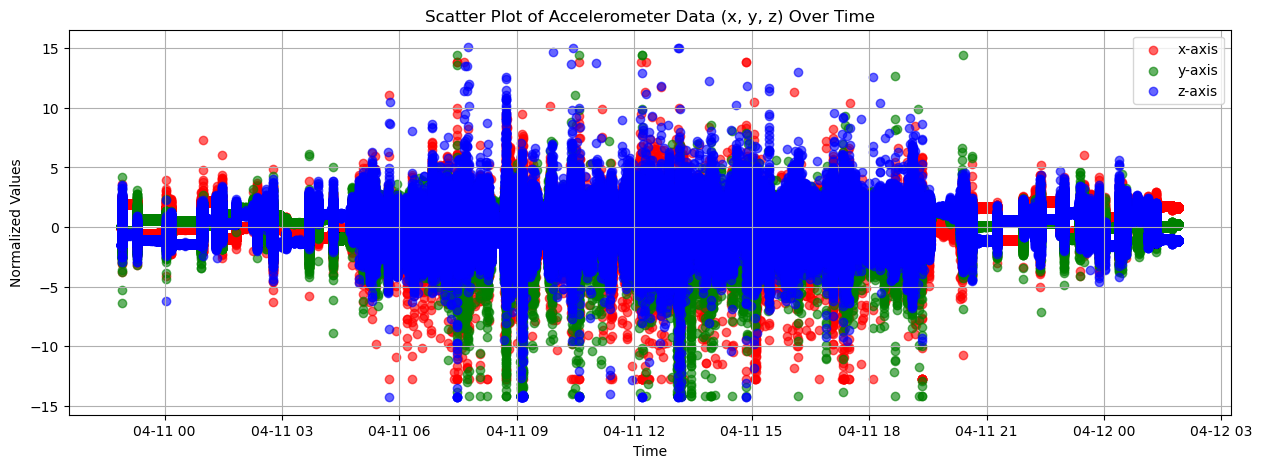

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of 'time' vs. 'x', 'y', and 'z' after normalization
plt.figure(figsize=(15, 5))
plt.scatter(df['time'], df['x'], c='r', label='x-axis', alpha=0.6)
plt.scatter(df['time'], df['y'], c='g', label='y-axis', alpha=0.6)
plt.scatter(df['time'], df['z'], c='b', label='z-axis', alpha=0.6)

plt.title('Scatter Plot of Accelerometer Data (x, y, z) Over Time')
plt.xlabel('Time')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


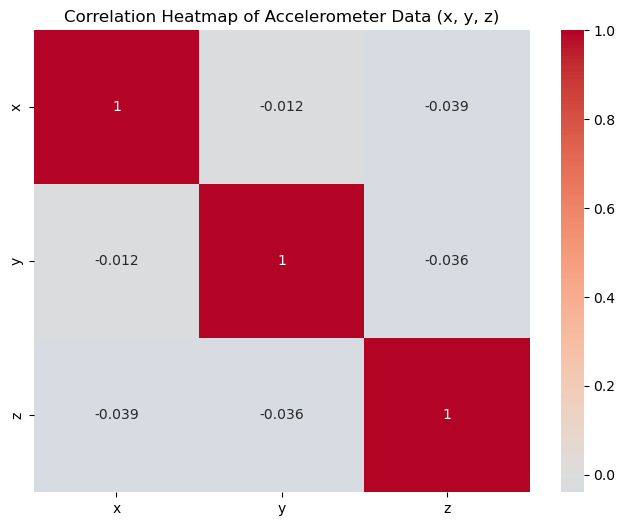

In [8]:
import seaborn as sns
import numpy as np

# Compute correlation matrix
correlation_matrix = df[['x', 'y', 'z']].corr()

# Plot heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap of Accelerometer Data (x, y, z)")
plt.show()


In [3]:
print("Columns in metadata:", metadata.columns)

Columns in metadata: Index(['pid', 'age', 'sex'], dtype='object')


In [4]:
import pandas as pd
import re

# Check if the annotation column exists in the dataset
if 'annotation' in df.columns:
    print("Unique values in annotation column:", df['annotation'].dropna().unique())  # Drop NaNs before checking unique values

    # Count occurrences of each annotation label
    annotation_counts = df['annotation'].value_counts()
    print("\nAnnotation counts:\n", annotation_counts)
else:
    print("⚠️ Warning: The 'annotation' column is missing in the dataset.")

# Function to extract the activity name before ';MET'
import re

# Function to extract the first activity category before the first semicolon
def extract_activity(annotation):
    if pd.isna(annotation):  # Handle missing values
        return "Unknown"
    activity = annotation.split(";")[0]  # Extract the first category before semicolon
    return activity

# Apply to dataset
if 'annotation' in df.columns:
    df['activity'] = df['annotation'].apply(extract_activity)
    print("✅ Successfully extracted simplified activities!")

    # Check unique extracted activity names
    print("Unique activities:", df['activity'].dropna().unique())  # Drop NaNs for better visibility
else:
    print("⚠️ Warning: Cannot extract activities since 'annotation' column is missing.")


Unique values in annotation column: ['7030 sleeping;MET 0.95'
 'home activity;household chores;preparing meals/cooking/washing dishes;5035 kitchen activity general cooking/washing/dishes/cleaning up;MET 3.3'
 'walking;MET 3.0'
 'home activity;miscellaneous;sitting;11580 office work such as writing and typing (with or without eating at the same time);MET 1.5'
 'home activity;miscellaneous;sitting;9060 sitting/lying reading or without observable/identifiable activities;MET 1.3'
 'home activity;miscellaneous;walking;17150 walking household without observable loads;MET 2.0'
 'home activity;leisure;activities for maintenance of a household;with children;5170 sitting playing with child(ren);MET 2.2'
 'home activity;miscellaneous;sitting;9055 sitting/lying talking in person/using a mobile phone/smartphone/tablet or talking on the phone/computer (skype chatting);MET 1.5'
 'home activity;self care;13040 (generic) self care such as grooming/washing hands/shaving/brushing teeth/putting on make-up

In [5]:
print(df.columns)

Index(['time', 'x', 'y', 'z', 'annotation', 'activity'], dtype='object')


/var/folders/g6/ylk1hnb57vsgdj88yg5sf2kw0000gn/T/ipykernel_11781/749874677.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


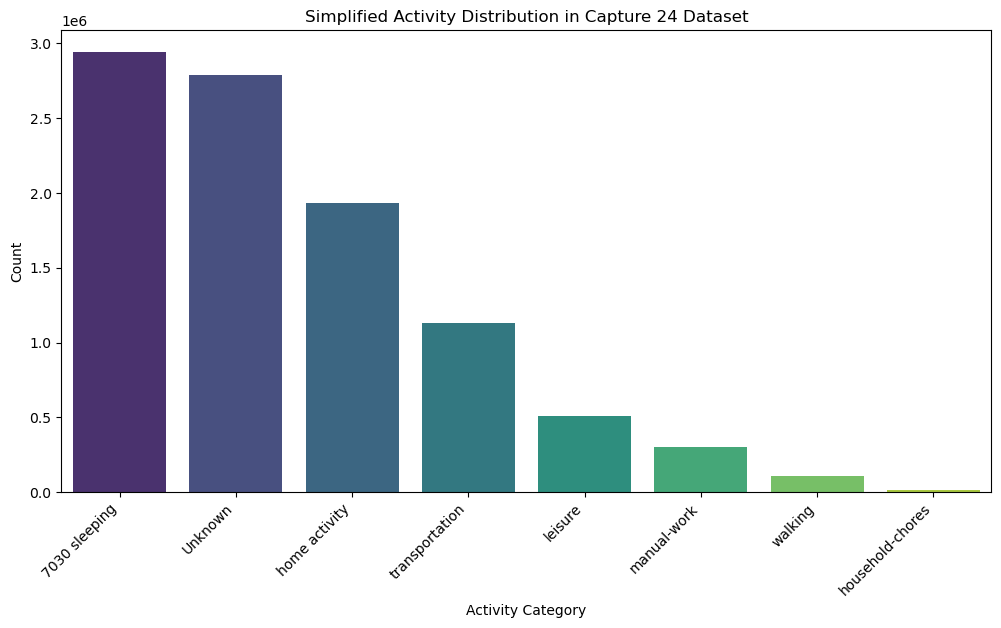

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of simplified activities
activity_counts = df['activity'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=activity_counts.index[:15], 
    y=activity_counts.values[:15], 
    palette="viridis"
)  # Top 15 activities

plt.xlabel("Activity Category")
plt.ylabel("Count")
plt.title("Simplified Activity Distribution in Capture 24 Dataset")
plt.xticks(rotation=45, ha="right")
plt.show()


In [7]:
print(df.columns)

Index(['time', 'x', 'y', 'z', 'annotation', 'activity'], dtype='object')


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assume "simplified_activity" is our target column
X = df[['x', 'y', 'z']]  # Features
y = df['activity']  # Target

# Convert categorical labels to numerical
y = y.astype('category').cat.codes

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.45


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"🌲 Random Forest Accuracy: {accuracy_rf:.2f}")



🌲 Random Forest Accuracy: 0.76


In [10]:
!pip install xgboost

In [22]:
from xgboost import XGBClassifier

# Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=8, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"⚡ XGBoost Accuracy: {accuracy_xgb:.2f}")

⚡ XGBoost Accuracy: 0.80


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the Deep Learning Model
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(y.unique()), activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the Model
model_dl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model_dl.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
loss, accuracy_dl = model_dl.evaluate(X_test, y_test)
print(f"🤖 Deep Learning Model Accuracy: {accuracy_dl:.2f}")


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
243000/243000 ━━━━━━━━━━━━━━━━━━━━ 1395s 6ms/step - accuracy: 0.6455 - loss: 0.9521 - val_accuracy: 0.7015 - val_loss: 0.8001
Epoch 2/20
243000/243000 ━━━━━━━━━━━━━━━━━━━━ 1929s 8ms/step - accuracy: 0.6871 - loss: 0.8428 - val_accuracy: 0.7090 - val_loss: 0.7864
Epoch 3/20
243000/243000 ━━━━━━━━━━━━━━━━━━━━ 2186s 9ms/step - accuracy: 0.6936 - loss: 0.8270 - val_accuracy: 0.7129 - val_loss: 0.7777
Epoch 4/20
243000/243000 ━━━━━━━━━━━━━━━━━━━━ 1297s 5ms/step - accuracy: 0.6962 - loss: 0.8185 - val_accuracy: 0.7137 - val_loss: 0.7729
Epoch 5/20
243000/243000 ━━━━━━━━━━━━━━━━━━━━ 78s 323us/step - accuracy: 0.6981 - loss: 0.8146 - val_accuracy: 0.7137 - val_loss: 0.7687
Epoch 6/20
243000/243000 ━━━━━━━━━━━━━━━━━━━━ 78s 321us/step - accuracy: 0.6989 - loss: 0.8125 - val_accuracy: 0.7104 - val_loss: 0.7692
Epoch 7/20
243000/243000 ━━━━━━━━━━━━━━━━━━━━ 79s 325us/step - accuracy: 0.6993 - loss: 0.8112 - val_accuracy: 0.7136 - val_loss: 0.7684
Epoch 8/20
243000/243000 ━━━━━━━━━━━━━━━━